In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
import ast

In [81]:
df = pd.read_csv("experiements/complex_net/20_05/evolutionary.csv")
# df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
0,0,1,0.000320,"[0.29701604270275506, 0.799223167313972, -0.79...",0.562790,0.000000
1,0,2,0.000042,"[-0.2794827176598298, 0.5444294212025369, 0.23...",0.562790,0.000000
2,0,3,-0.073620,"[-0.7330587725522015, -0.5805076744760707, 0.8...",0.562790,0.143314
3,0,4,0.000262,"[0.38232093861237626, -0.9054653549972151, 0.0...",0.562790,0.000000
4,0,5,0.000234,"[-0.8261574188862069, -0.07970556458445599, 0....",0.562790,0.000000
...,...,...,...,...,...,...
6875,343,5414,0.000186,"[0.11946574374407569, -0.16592631151305218, 0....",0.259215,0.000000
6876,343,5415,-0.114677,"[0.021130739885649306, -0.5759359979214134, 0....",0.259215,0.053743
6877,343,5416,0.000141,"[0.0002722693973903293, -0.6929359927270875, 0...",0.259215,0.000000
6878,343,5417,-0.014703,"[0.09906638901023071, -0.8642557036767955, 0.3...",0.259215,0.000000


In [82]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


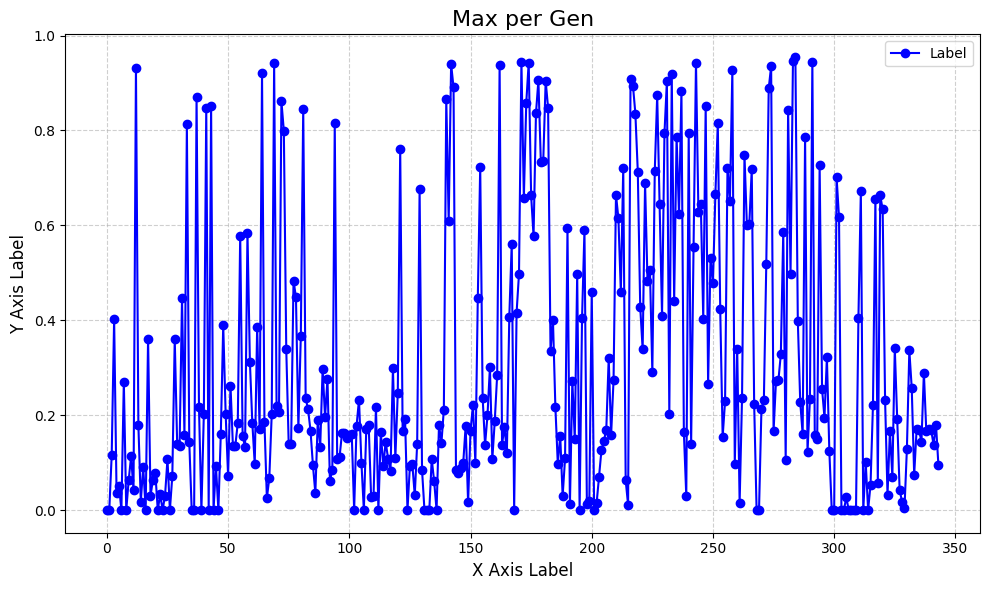

In [83]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].max().reset_index()

diversity_per_gen.to_csv("max_per_gen.csv", index=False)

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

In [84]:
max_vale = df.loc[(df["Gen Number"] == 70)]["Fitness"].max()
df.loc[  (df["Gen Number"] == 70)].loc[df["Fitness"] == max_vale]

,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
1418,70,1109,0.219925,"[-0.2378196525089143, 0.7743361453279523, -0.8...",0.454587,0.260397


In [95]:
max_value = df.loc[df["Gen Number"] == 343]["Fitness"].max()
df.loc[(df["Fitness"] == max_value) & (df["Gen Number"] == 343)]


,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
6868,343,5407,0.094603,"[0.0413961891180703, -0.7763382807468471, 0.36...",0.259215,0.120921


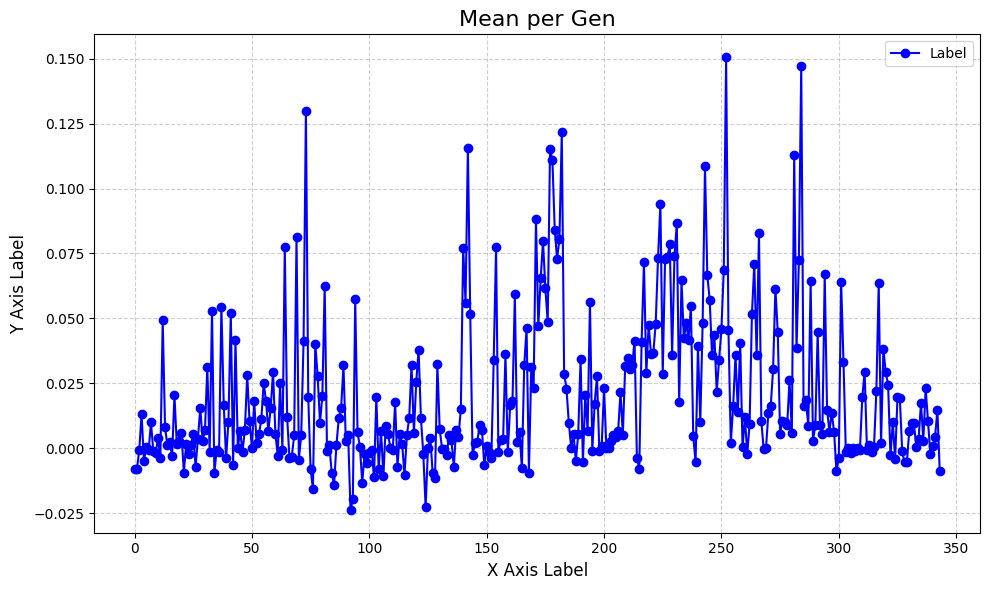

In [86]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].mean().reset_index()

diversity_per_gen.to_csv("mean_per_gen.csv", index=False)

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")

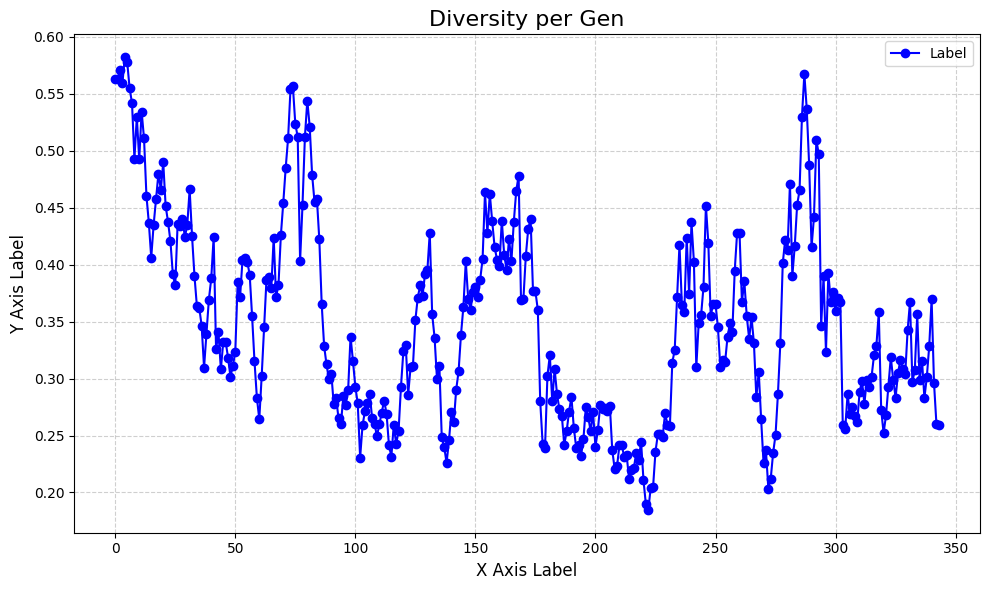

In [87]:
diversity_per_gen = df.groupby("Gen Number")["Diversity"].mean().reset_index()

diversity_per_gen.to_csv("diversity_per_gen.csv", index=False)

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Diversity"]

plot_graph(x_values, y_values, "Diversity per Gen")

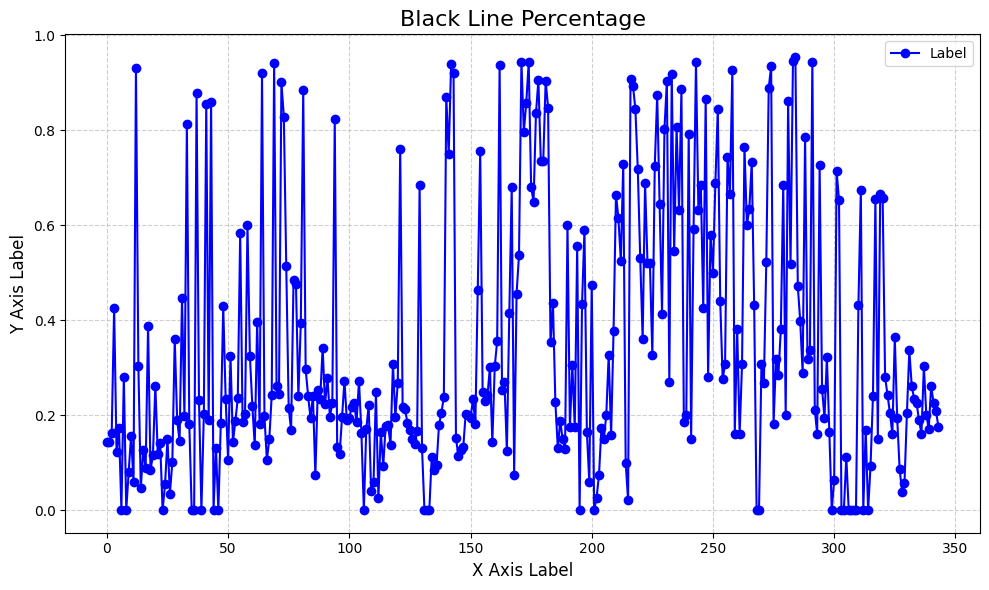

In [88]:
black_area_covered_per_gen = df.groupby("Gen Number")["Black Line Percentage"].max().reset_index()

black_area_covered_per_gen.to_csv("black_area_per_gen.csv", index=False)

x_values = black_area_covered_per_gen.index
y_values = black_area_covered_per_gen["Black Line Percentage"]

plot_graph(x_values, y_values, "Black Line Percentage")

In [89]:
max_value = black_area_covered_per_gen["Black Line Percentage"].max()
print(max_value)
df.loc[(df["Black Line Percentage"] == max_value)]
# gen = black_area_covered_per_gen.loc[black_area_covered_per_gen["Black Line Percentage"] == max_value, "Gen Number"].iloc[0]
# max_value = df.loc[df["Gen Number"] == gen, "Black Line Percentage"].max()
# df.loc[(df["Gen Number"] == gen) & (df["Black Line Percentage"] == max_value)]


0.9545745361484324


,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
5686,284,4461,0.954844,"[0.9050202665025198, -0.9763798370334489, 0.90...",0.452603,0.954575


In [90]:
import pandas as pd

# Load your 4 CSV files
df1 = pd.read_csv("black_area_per_gen.csv")
df2 = pd.read_csv("diversity_per_gen.csv")
df3 = pd.read_csv("max_per_gen.csv")
df4 = pd.read_csv("mean_per_gen.csv")

# Concatenate them column-wise
merged_df = pd.concat([df1, df2, df3, df4], axis=1)

# Save the merged DataFrame to a new CSV
merged_df.to_csv("merged_output.csv", index=False)


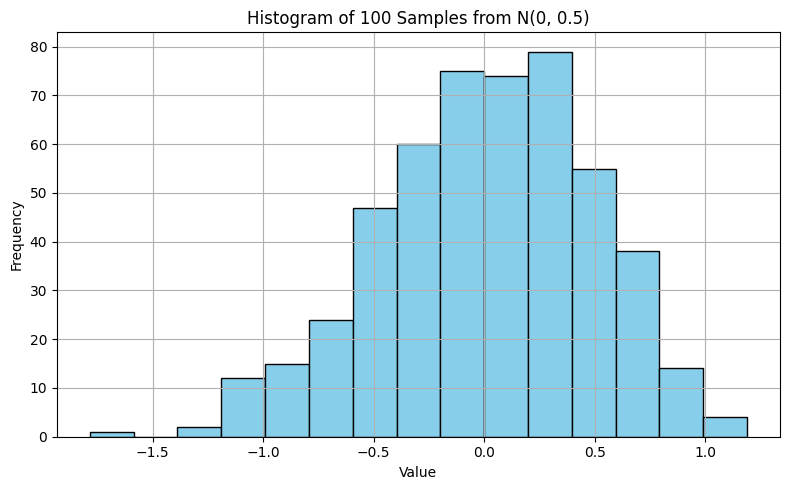

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random samples from a normal distribution with mean 0 and standard deviation 0.5
samples = [np.random.normal(0, 0.5) for _ in range(500)]

# Plot a histogram of the samples
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of 100 Samples from N(0, 0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
import numpy as np
import torch
import torch.nn.functional as F

NUM_ANGLES = 17
angle_bins = torch.linspace(-np.pi, np.pi, NUM_ANGLES)  # shape [17]
angle_bins

tensor([-3.1416, -2.7489, -2.3562, -1.9635, -1.5708, -1.1781, -0.7854, -0.3927,
         0.0000,  0.3927,  0.7854,  1.1781,  1.5708,  1.9635,  2.3562,  2.7489,
         3.1416])

In [93]:
a = {"FITNESS": 1, "LINE_PERCENTAGE": 2} 
b = {"FITNESS": 3, "LINE_PERCENTAGE": 2}
a["FITNESS"] /= b["FITNESS"]
a

{'FITNESS': 0.3333333333333333, 'LINE_PERCENTAGE': 2}